### Bank suscription predictor

In this project we will use a Portuguese Bank Marketing Data Set, which you can find on kaggle [here](https://www.kaggle.com/datasets/yufengsui/portuguese-bank-marketing-data-set?resource=download&select=bank-full.csv), to predict a hypothetical term deposit. To do so, we will follow the data science workflow shown in the figure below.
![alt text](datascience_workflow.jpeg "Title")
Since the data is already collected, we will start with the second step, the process of cleaning the dataset.

In [1]:
# We define all the packages needed to carry out the project
# --- Data visualization and data analysis ---
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import uniform
import pandas as pd
import prince
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import model_selection
from sklearn import preprocessing

# --- Machine learning models ---
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

In [2]:
# We import the dataset as a Pandas DataFrame object
data = pd.read_csv('bank-full.csv', sep=';')

# To understand a little bit more about the dataset, we ask Python to give us some information about it
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


It is good to note that there are just object (string) and integer variables in the dataset. This means that all the variables are of $categorical$ type. Also, we have 45211 rows and 17 columns. Let us inspect the values the variables take in each column.

In [3]:
# Let us check if there are missing values in each column of the dataset
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Since the dataset has no missing values because all the values we got above are 0, we are in a good position to tackle the data exploration stage.

In [4]:
# Let us get some statistical information regarding the non-categorical variables of the dataset
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


To better understand the numerical data, we proceed to plot it in histograms. We will plot a histogram for each numerical variable.

In [5]:
# We get the names of numerical variables
name_num = data.select_dtypes([np.number]).columns
print(name_num)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


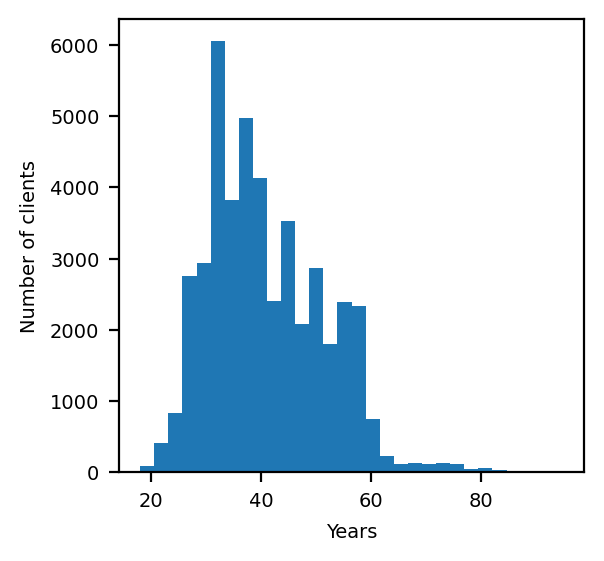

In [6]:
# Histogram of age column
plt.hist(data['age'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Years', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

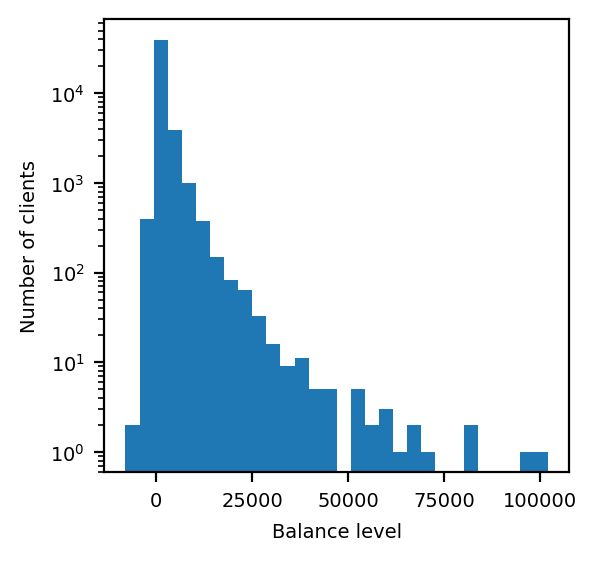

In [7]:
# Histogram of balance column
plt.hist(data['balance'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Balance level', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.yscale('log')
plt.show()

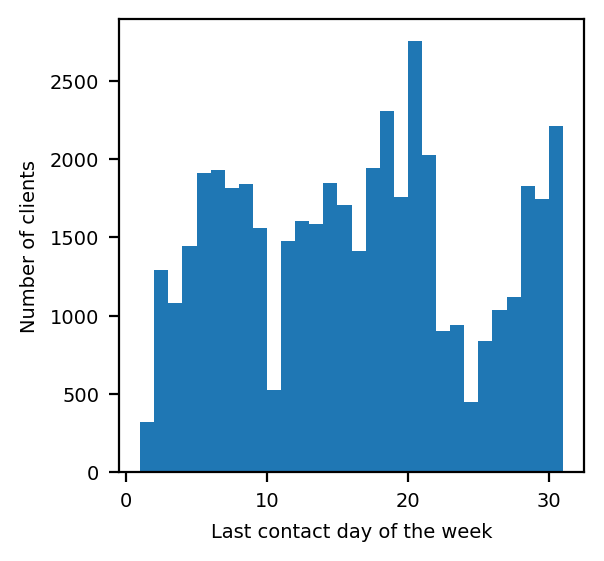

In [8]:
# Histogram of day column
plt.hist(data['day'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Last contact day of the week', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

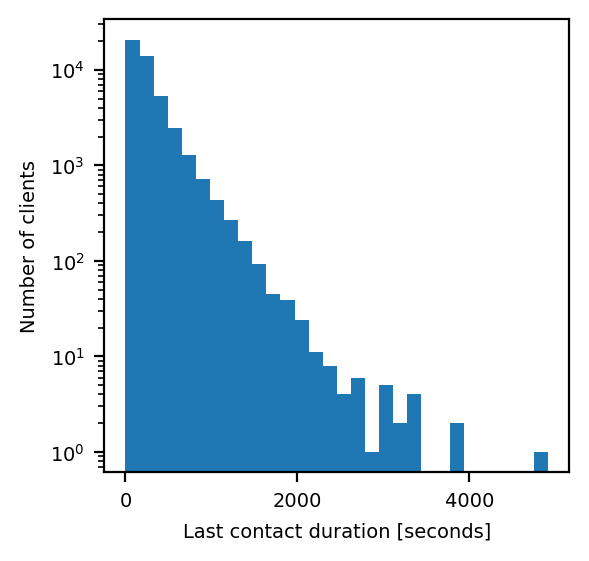

In [9]:
# Histogram of duration column
plt.hist(data['duration'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Last contact duration [seconds]', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.yscale('log')
plt.show()

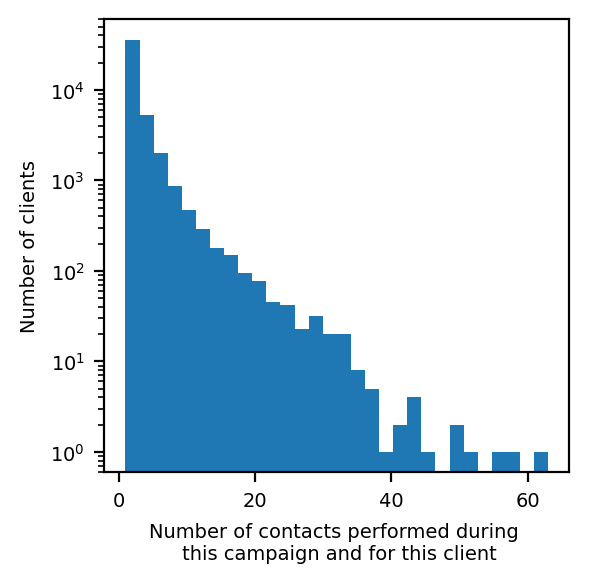

In [10]:
# Histogram of campaign column
plt.hist(data['campaign'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Number of contacts performed during \n this campaign and for this client', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.yscale('log')
plt.show()

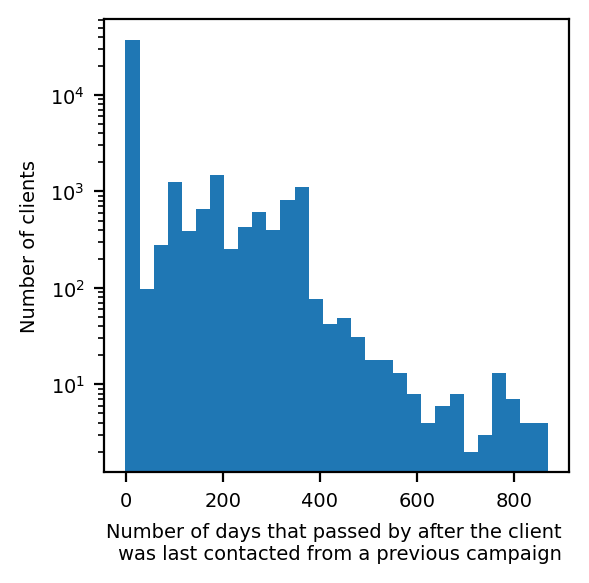

In [11]:
# Histogram of pdays column
plt.hist(data['pdays'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Number of days that passed by after the client \n was last contacted from a previous campaign', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.yscale('log')
plt.show()

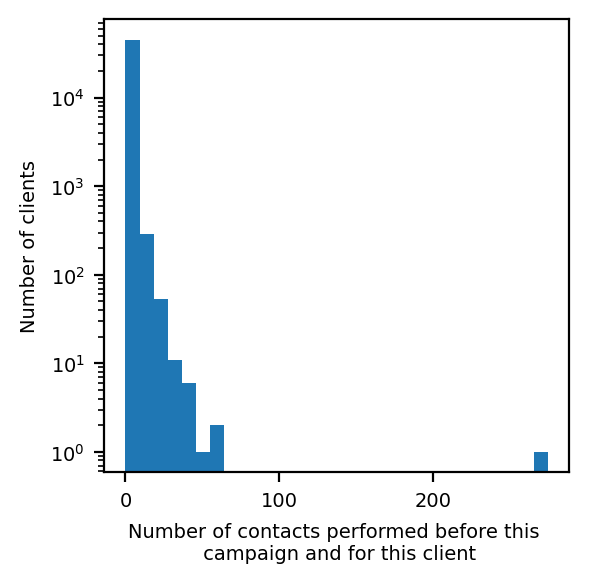

In [12]:
# Histogram of previous column
plt.hist(data['previous'].values, bins=30, figure=plt.figure(figsize=(3,3), dpi=200))
plt.xlabel('Number of contacts performed before this \n campaign and for this client', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.yscale('log')
plt.show()

Now, we will proceed to make a type of graph similar to the previous ones but for the categorical variables.

In [13]:
# We get the names of the categorical columns
data.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

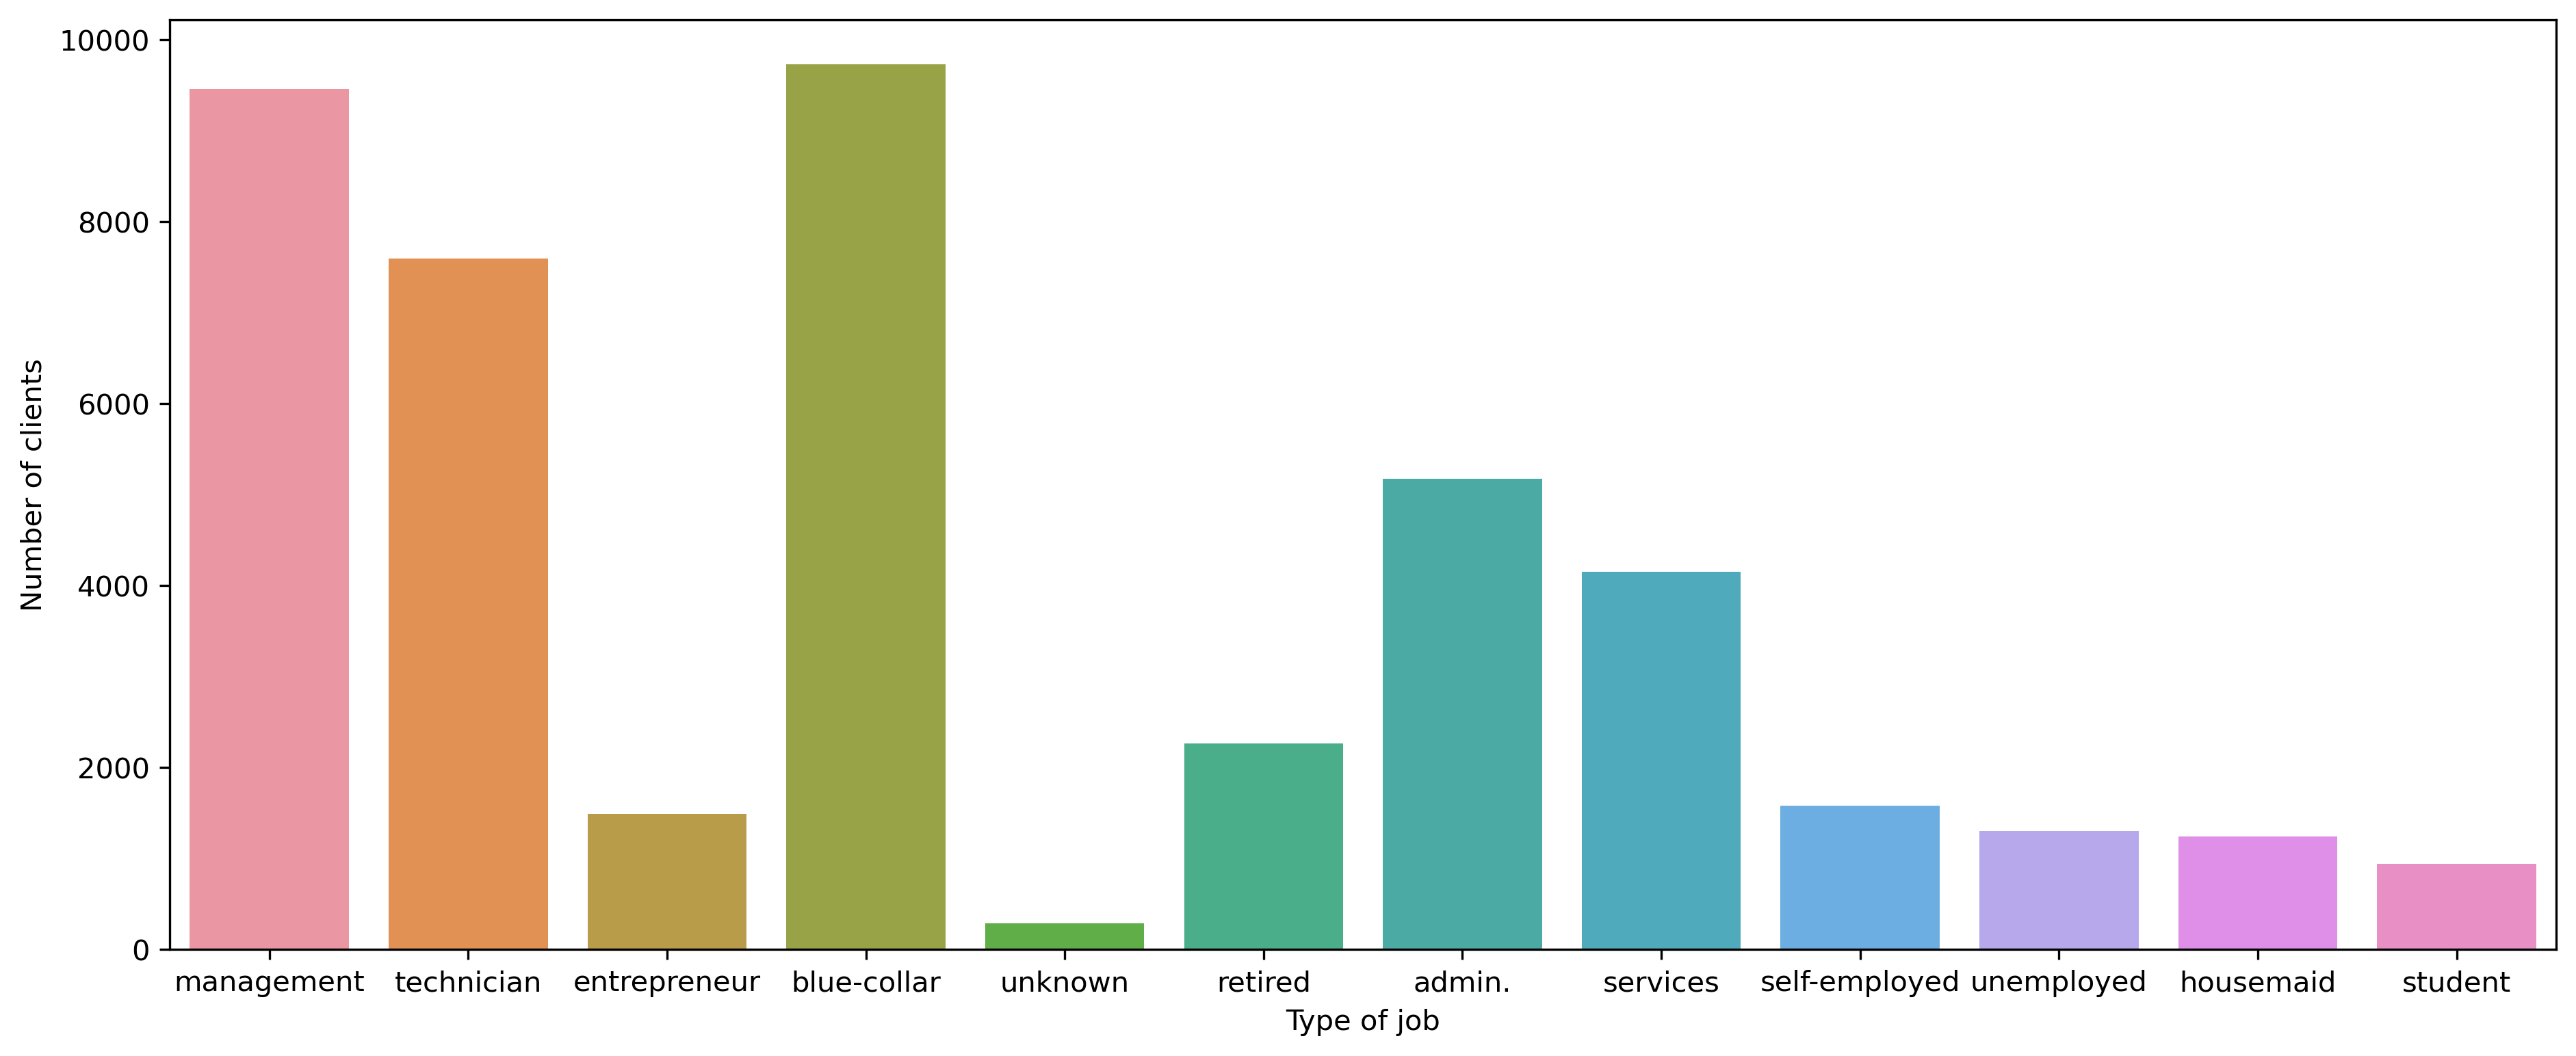

In [14]:
# Counterplot corresponding to job column
sns.countplot(x='job', data=data, figure=plt.figure(figsize=(15,6), dpi=300))
plt.xlabel('Type of job')
plt.ylabel('Number of clients')
plt.show()

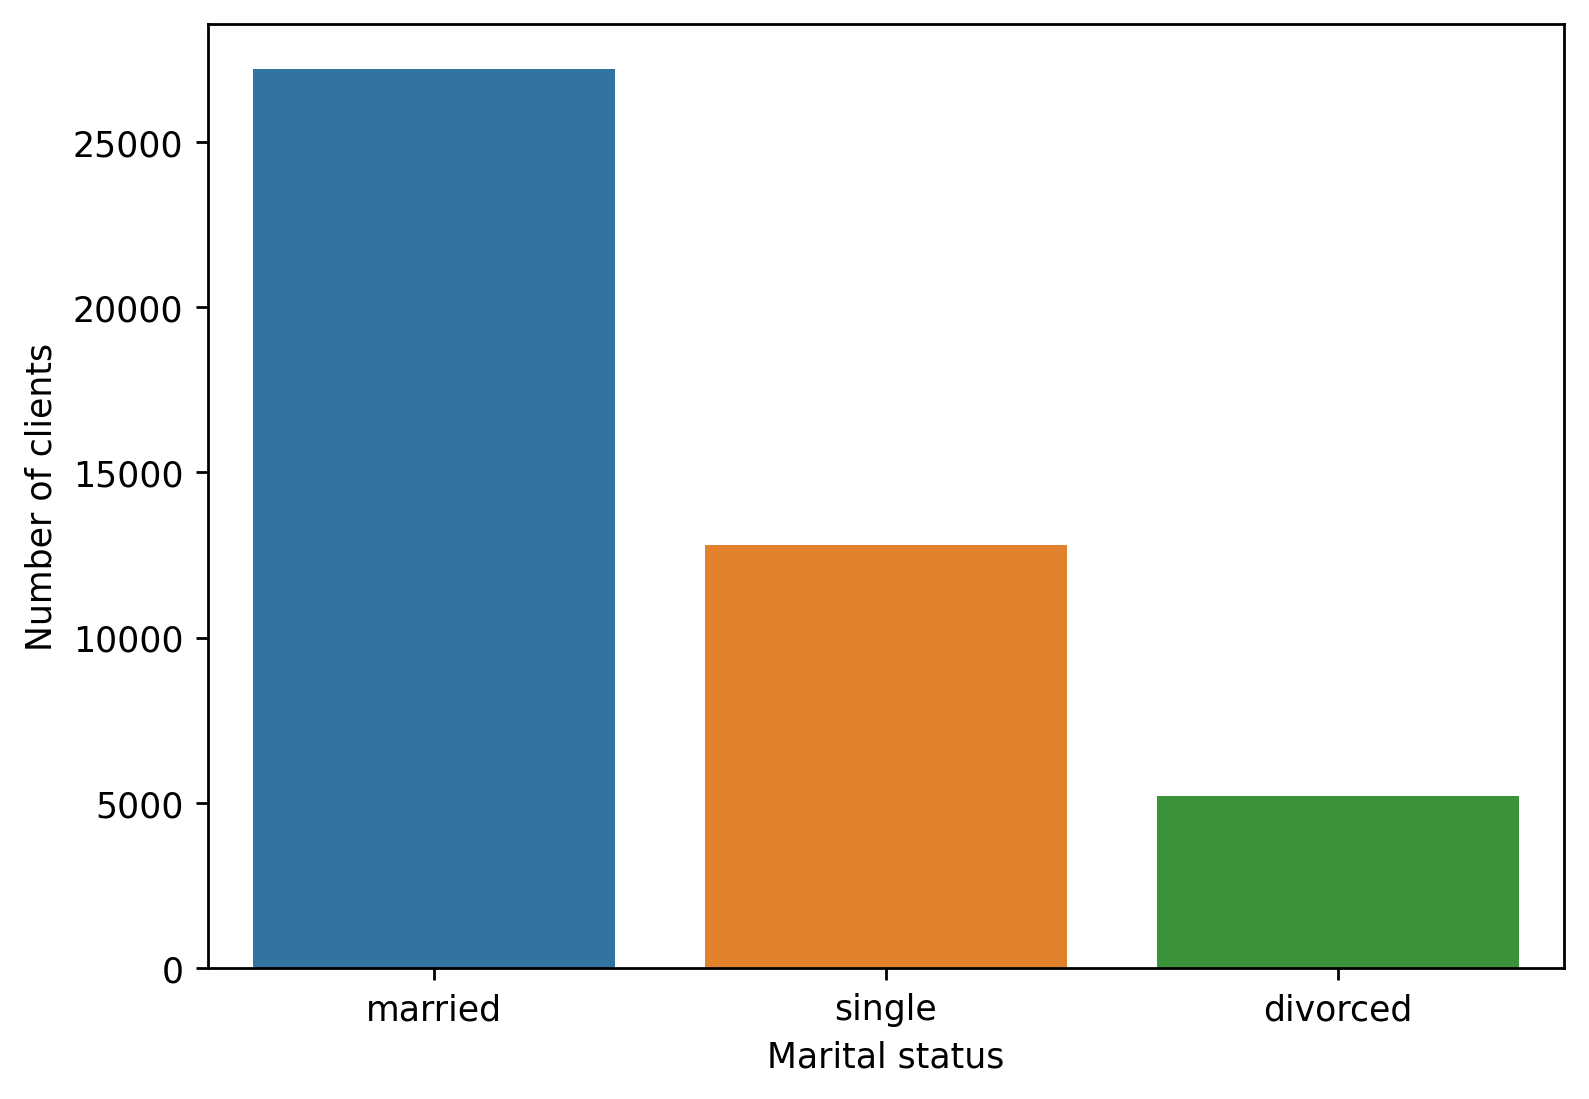

In [15]:
# Counterplot corresponding to marital column
sns.countplot(x='marital', data=data, figure=plt.figure(figsize=(7,5), dpi=250))
plt.xlabel('Marital status')
plt.ylabel('Number of clients')
plt.show()

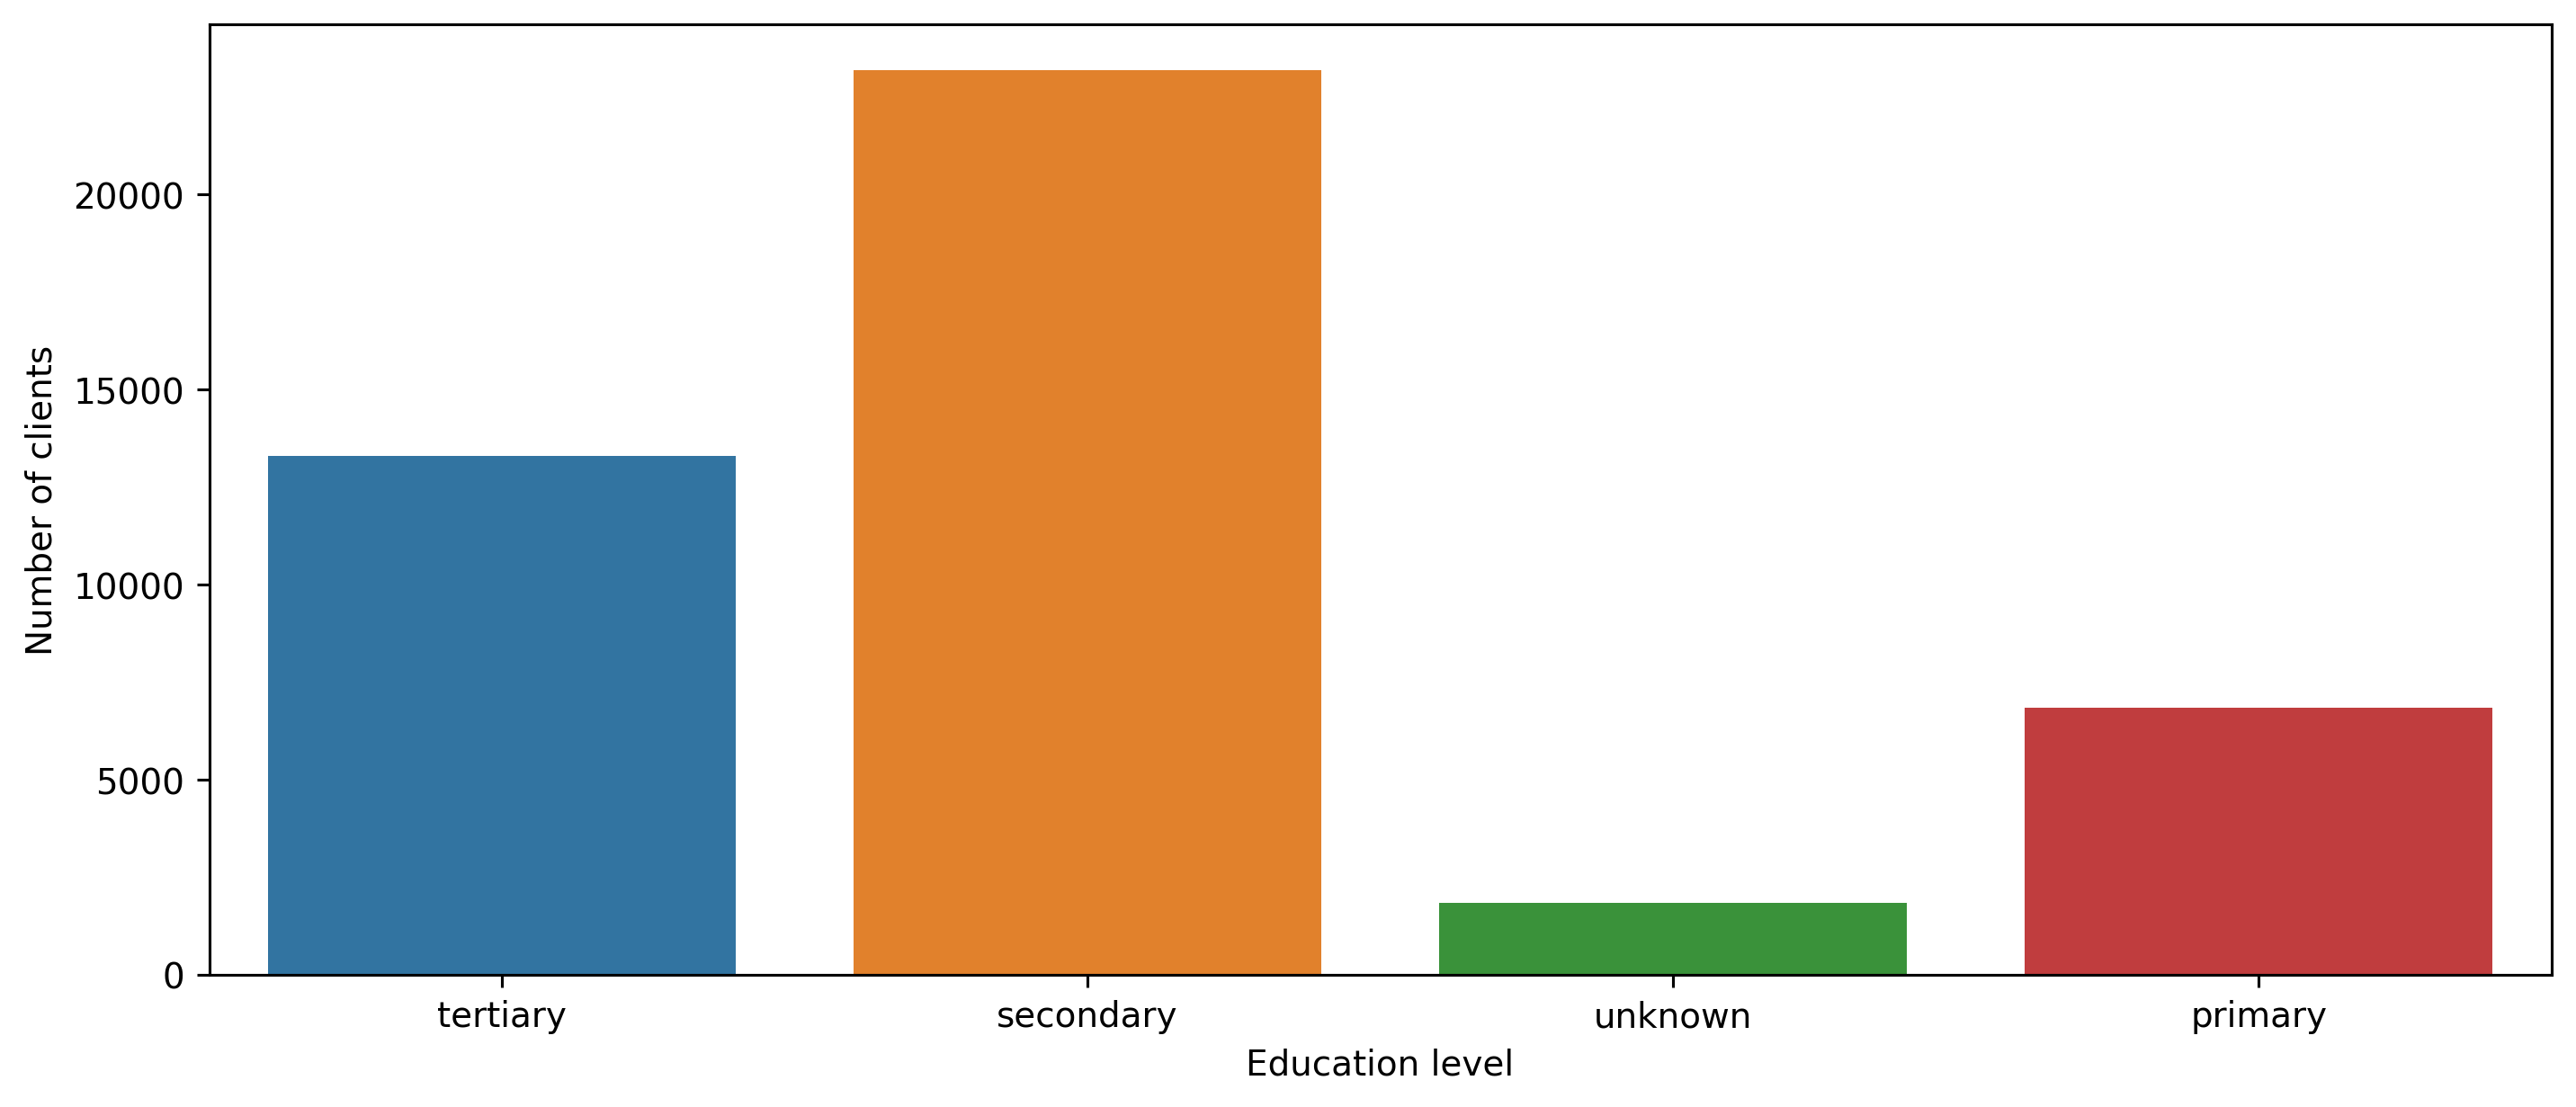

In [16]:
# Counterplot corresponding to education column
sns.countplot(x='education', data=data, figure=plt.figure(figsize=(12,5), dpi=280))
plt.xlabel('Education level')
plt.ylabel('Number of clients')
plt.show()

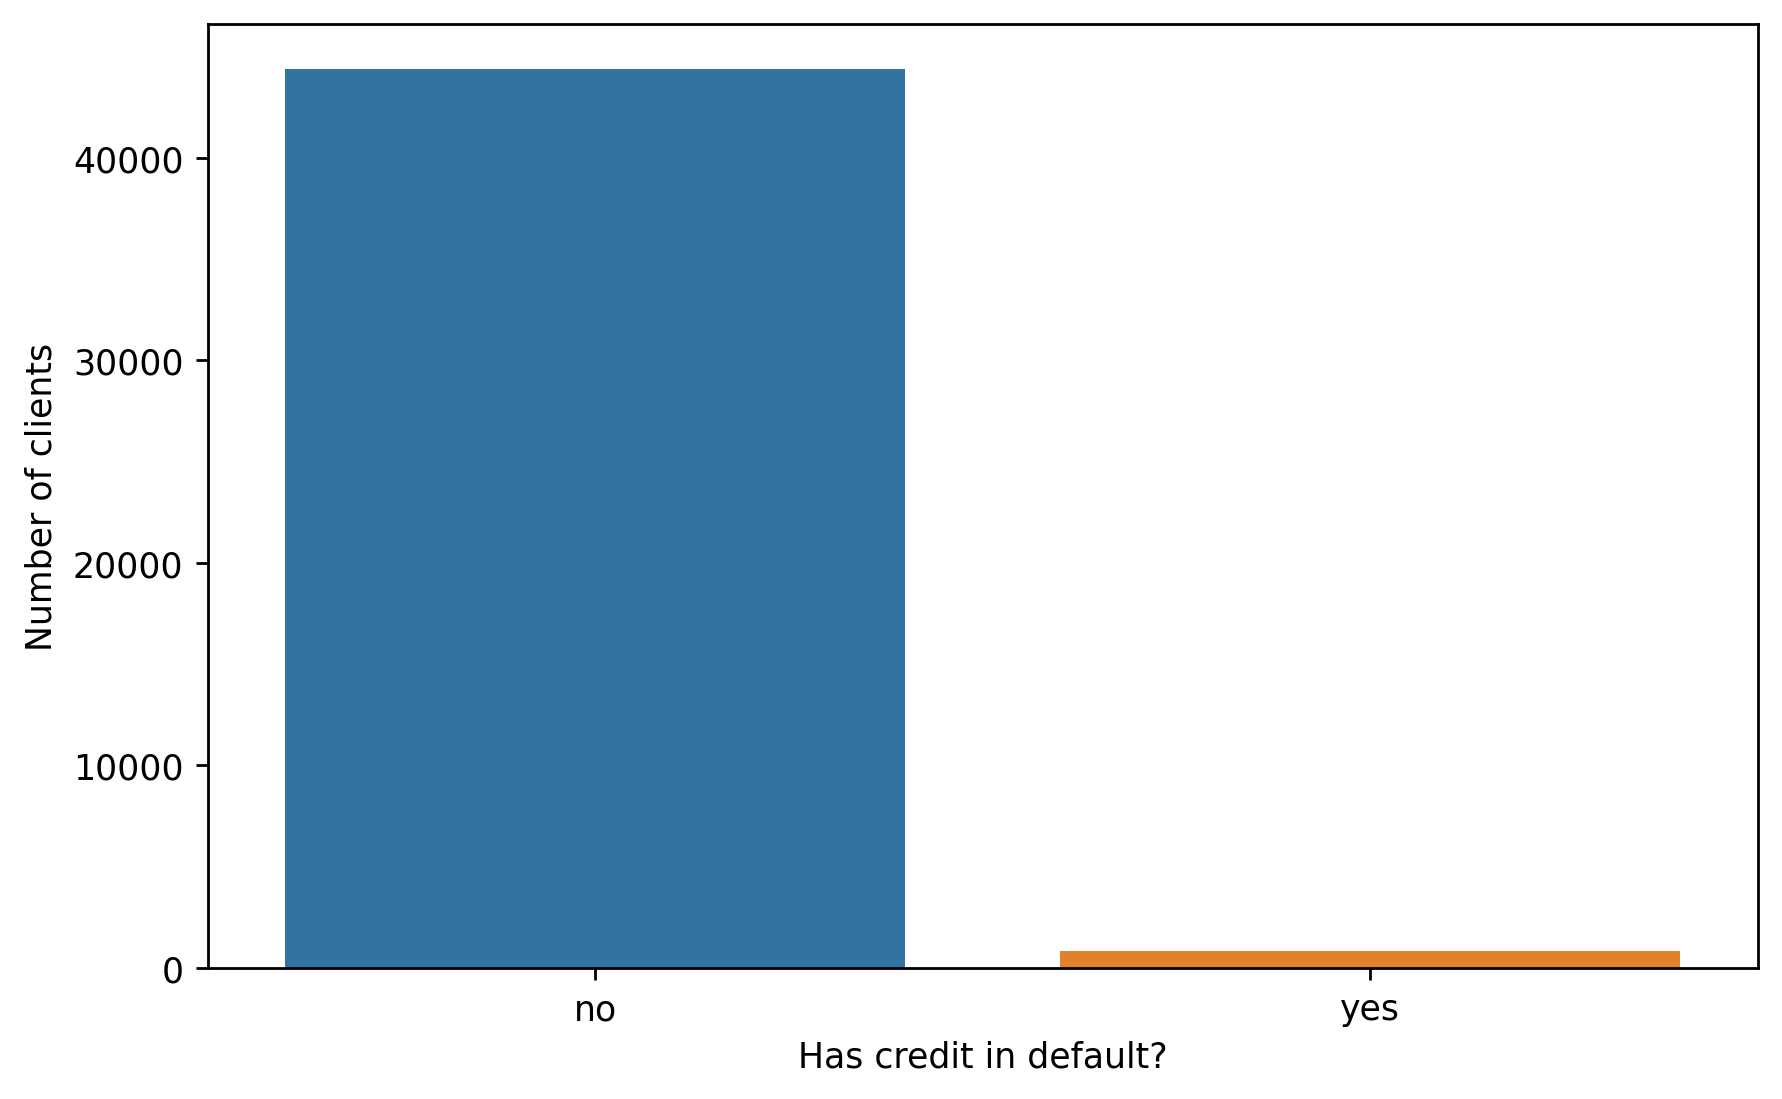

In [17]:
# Counterplot corresponding to default column
sns.countplot(x='default', data=data, figure=plt.figure(figsize=(8,5), dpi=250))
plt.xlabel('Has credit in default?')
plt.ylabel('Number of clients')
plt.show()

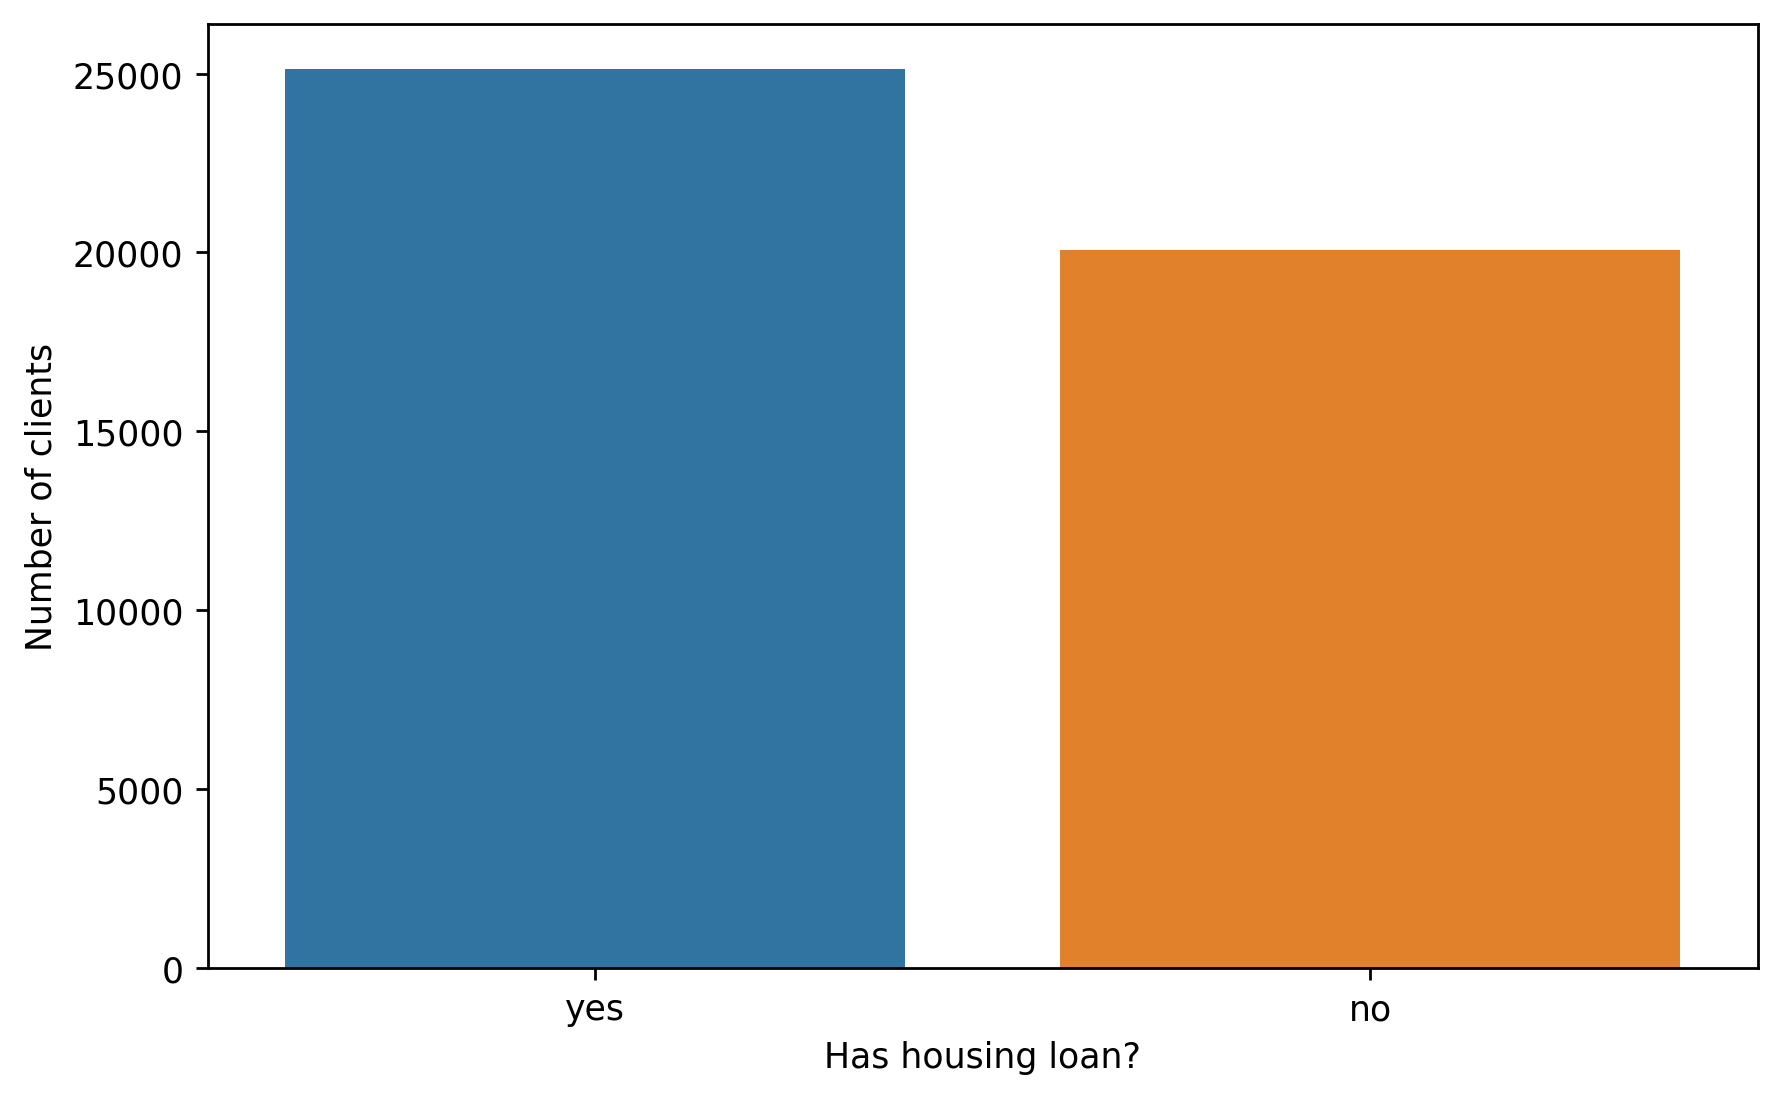

In [18]:
# Counterplot corresponding to housing column
sns.countplot(x='housing', data=data, figure=plt.figure(figsize=(8,5), dpi=250))
plt.xlabel('Has housing loan?')
plt.ylabel('Number of clients')
plt.show()

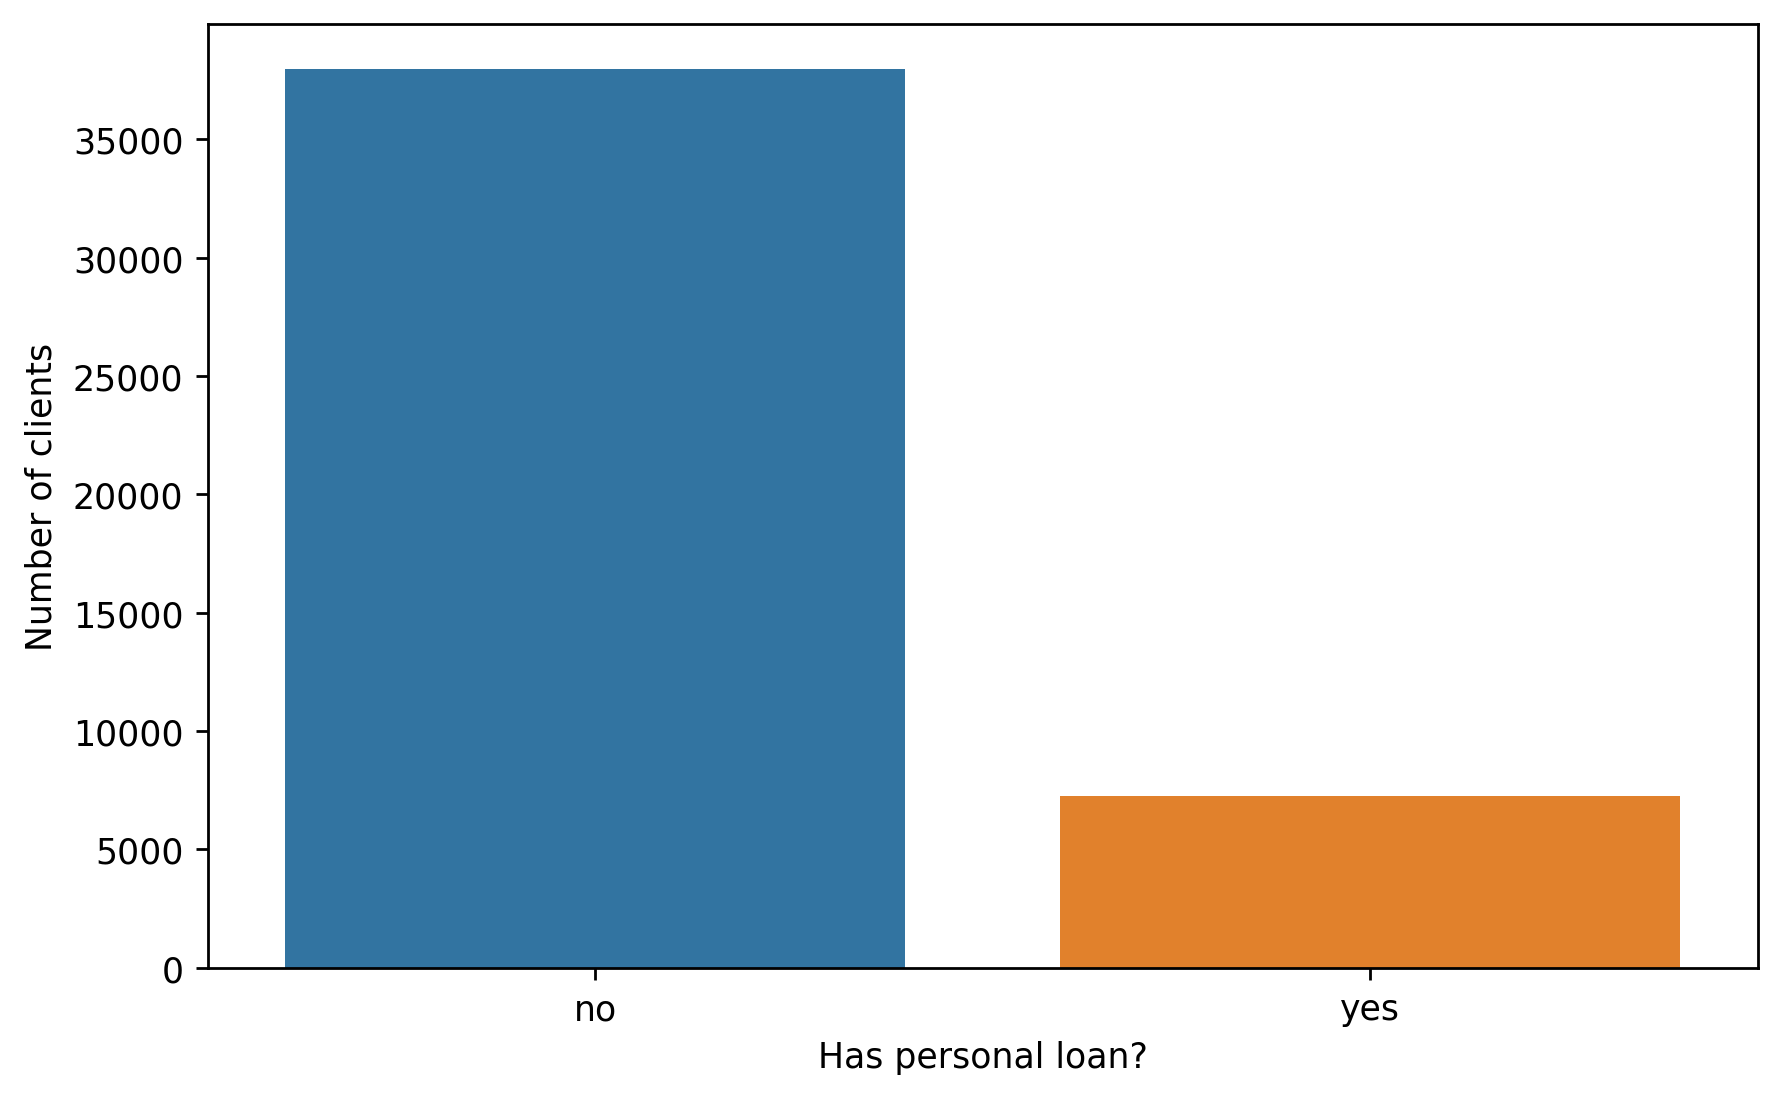

In [19]:
# Counterplot corresponding to loan column
sns.countplot(x='loan', data=data, figure=plt.figure(figsize=(8,5), dpi=250))
plt.xlabel('Has personal loan?')
plt.ylabel('Number of clients')
plt.show()

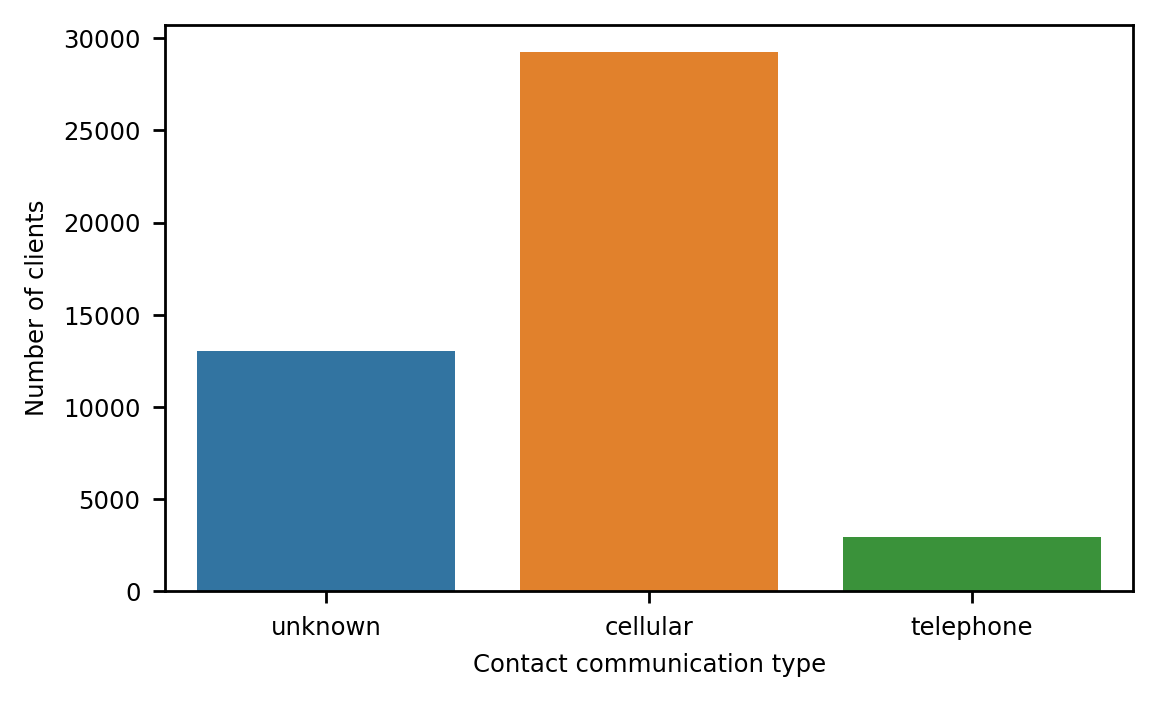

In [20]:
# Counterplot corresponding to contact column
sns.countplot(x='contact', data=data, figure=plt.figure(figsize=(5,3), dpi=250))
plt.xlabel('Contact communication type', fontsize=7)
plt.ylabel('Number of clients', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

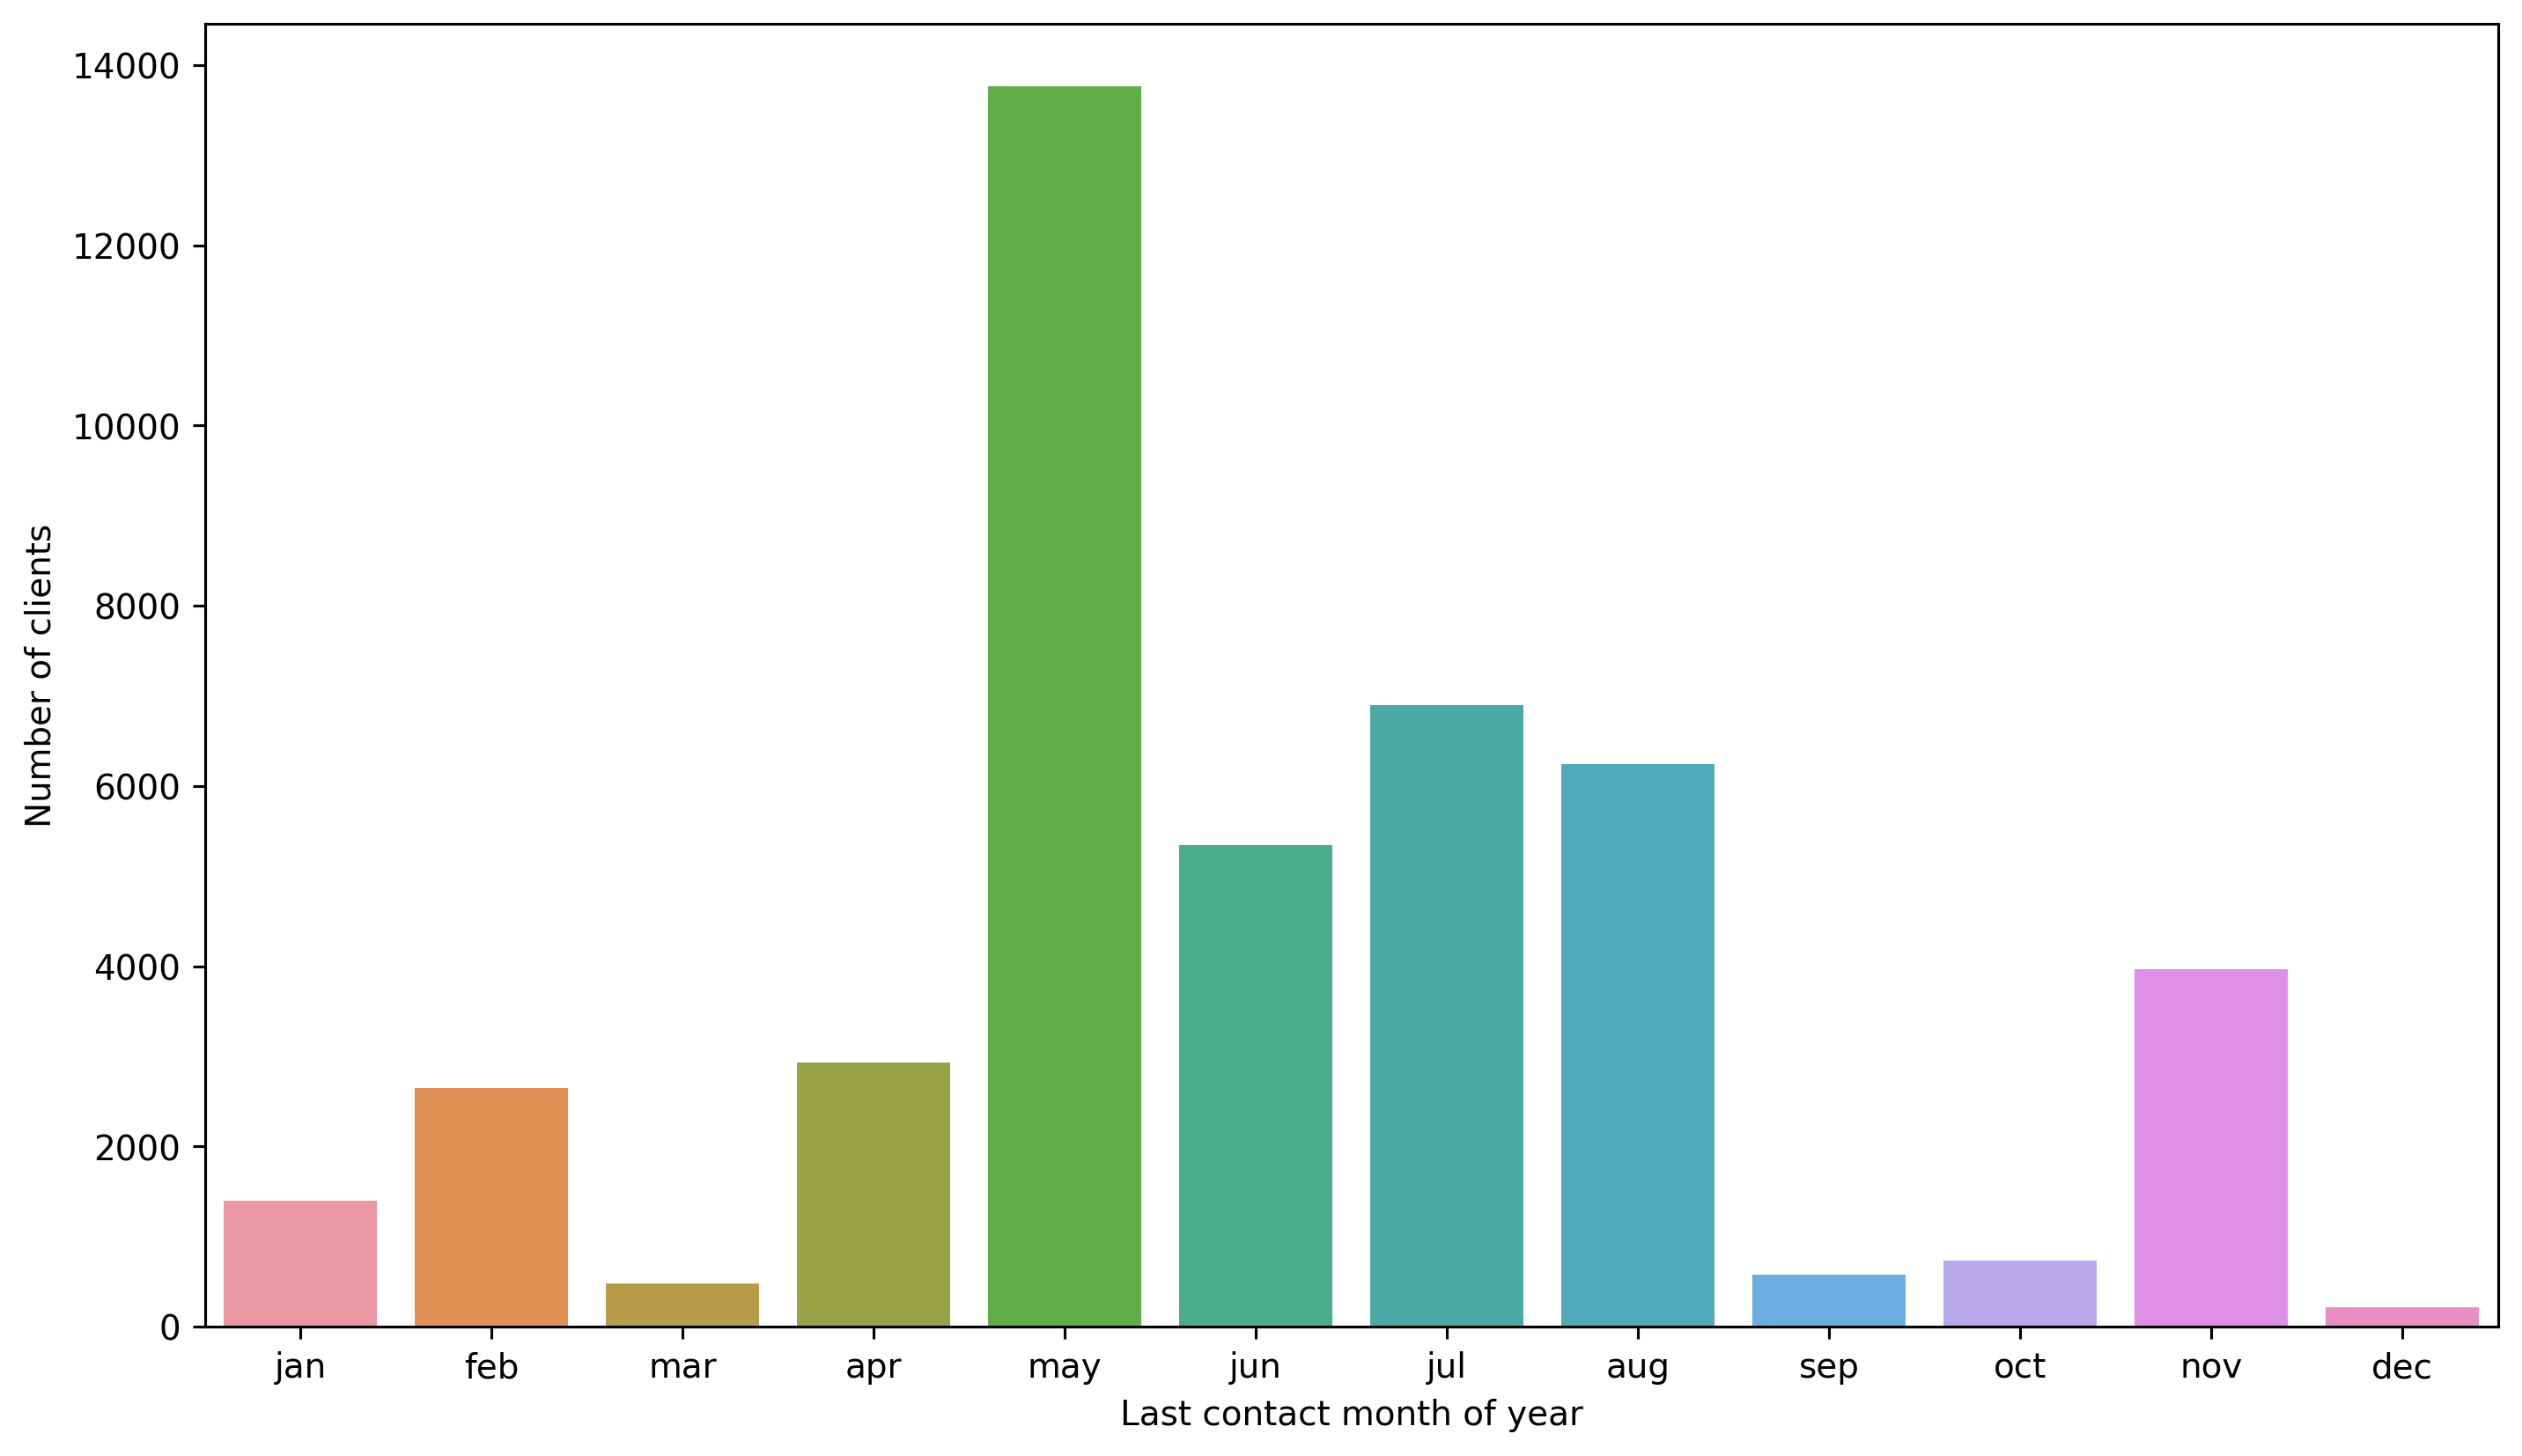

In [21]:
# Counterplot corresponding to month column
sns.countplot(x='month', data=data, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], figure=plt.figure(figsize=(12,7), dpi=280))
plt.xlabel('Last contact month of year')
plt.ylabel('Number of clients')
plt.show()

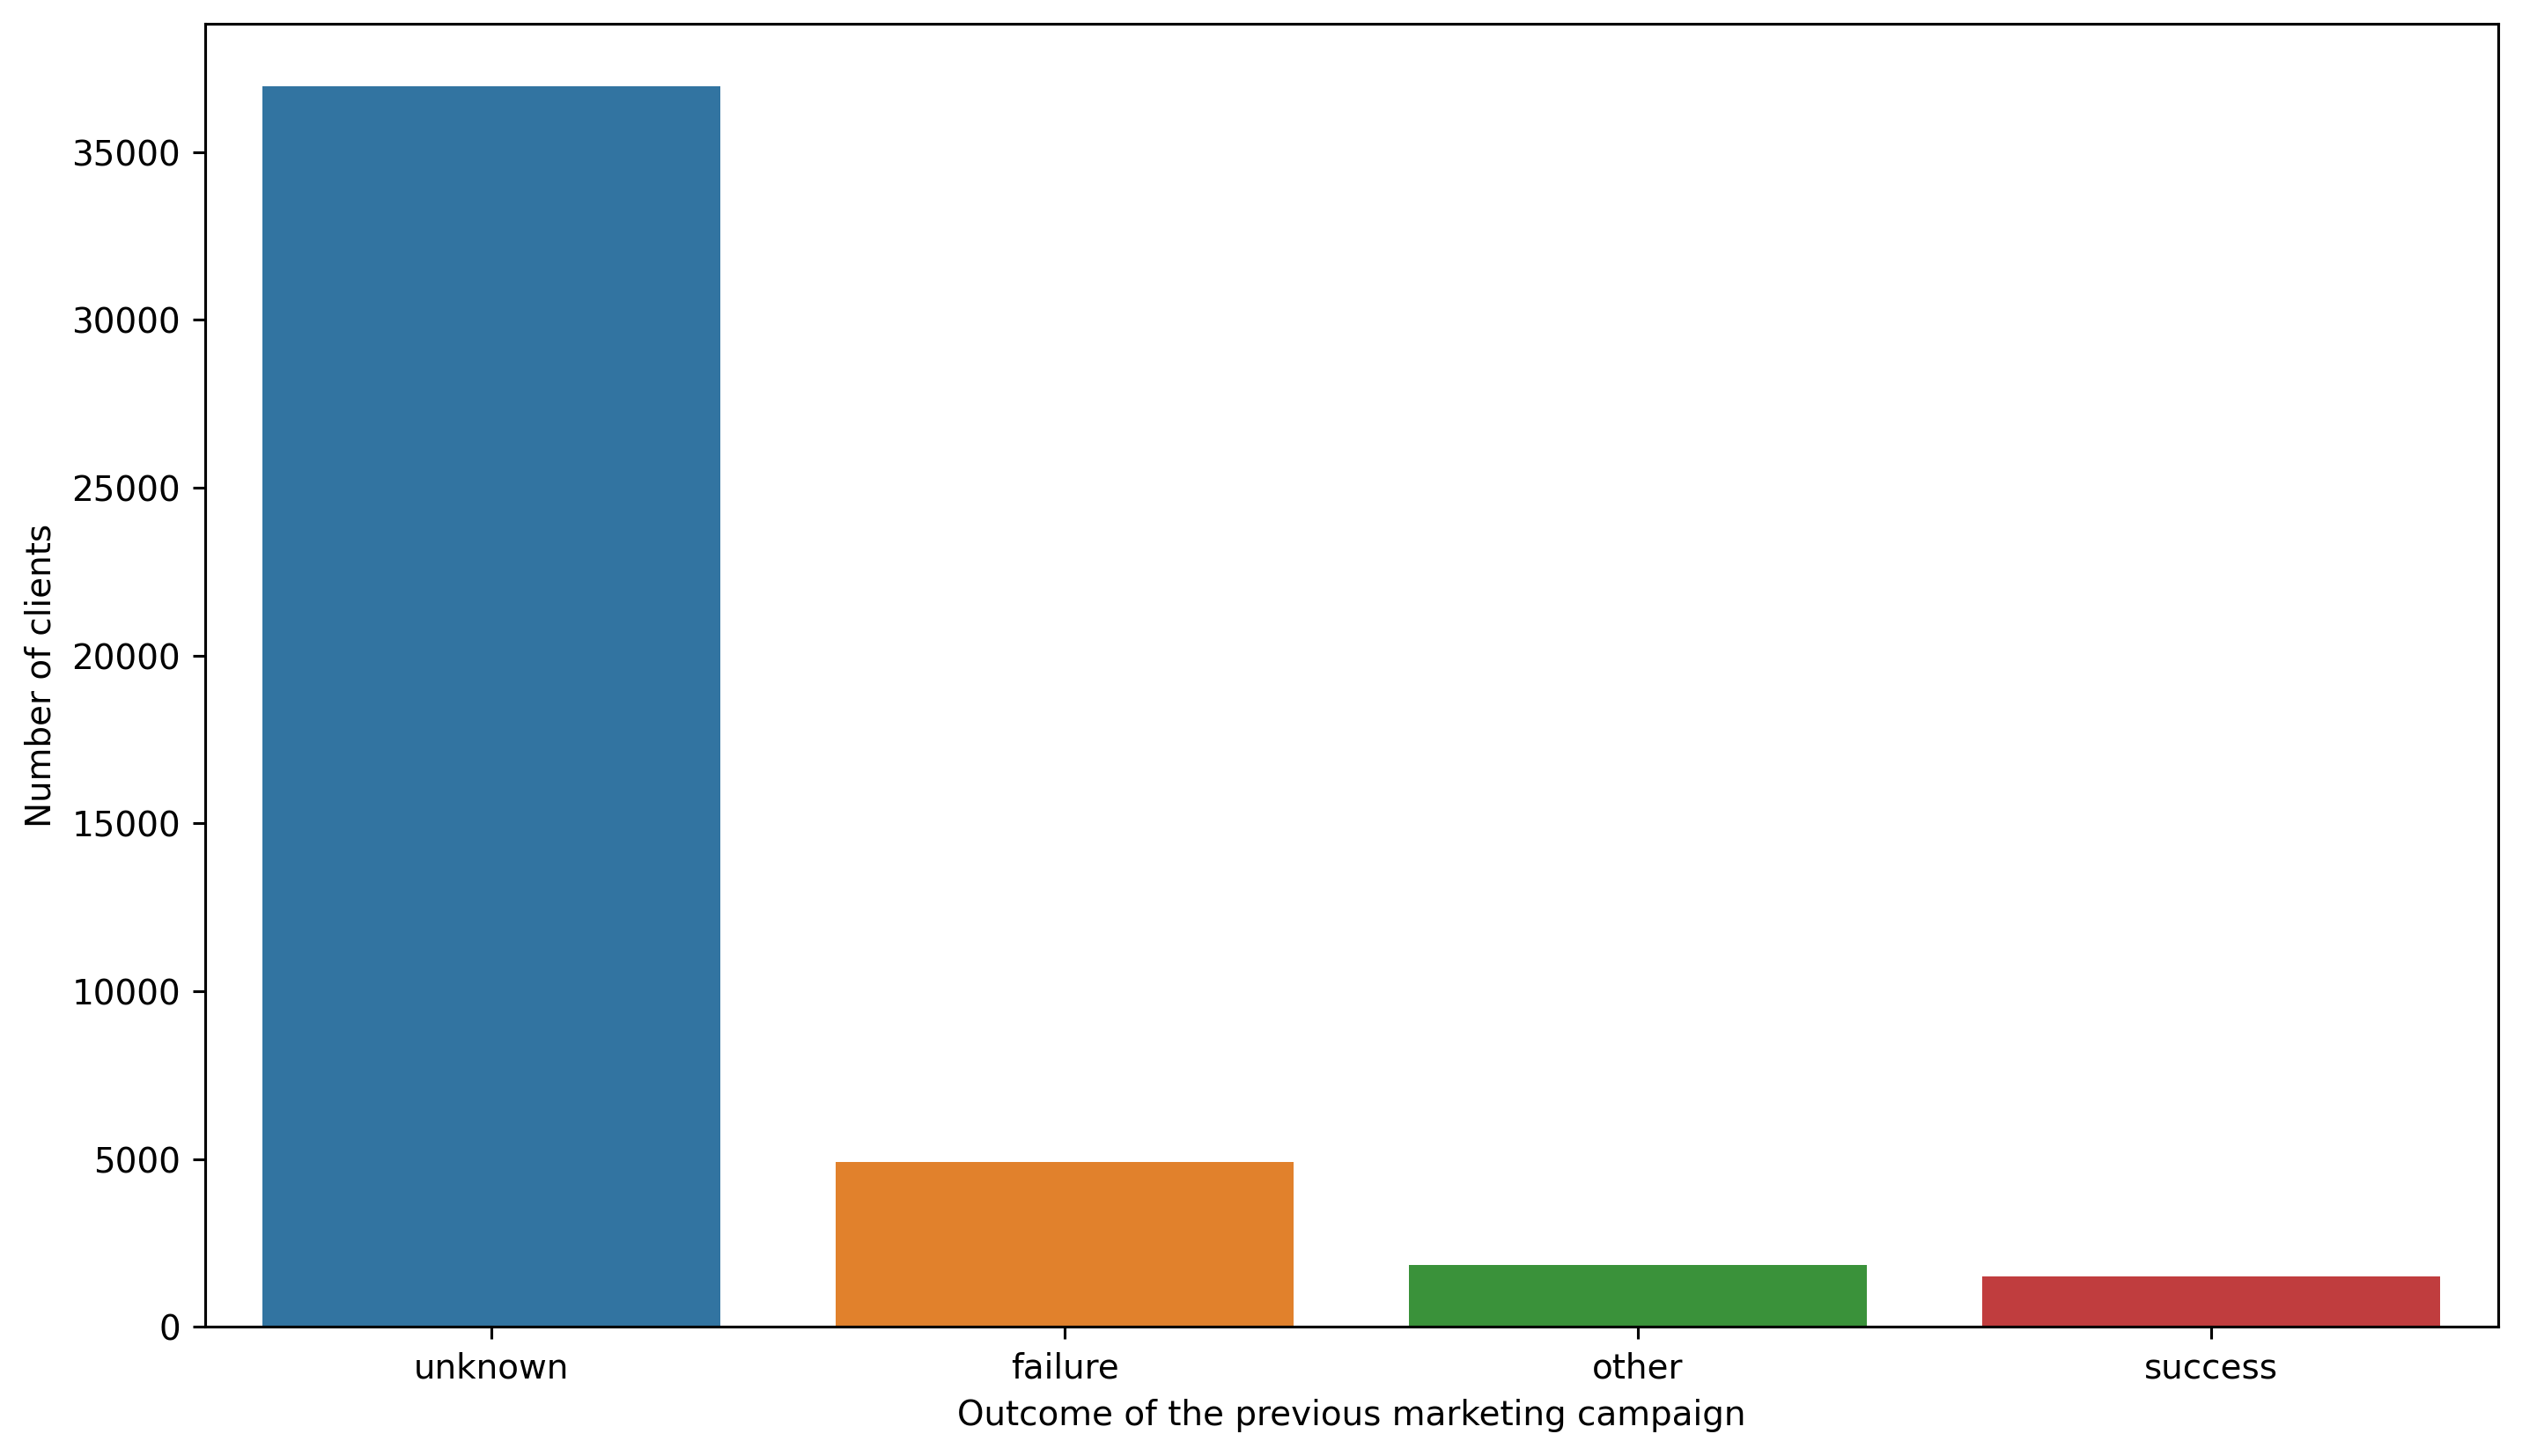

In [22]:
# Counterplot corresponding to poutcome column
sns.countplot(x='poutcome', data=data, figure=plt.figure(figsize=(12,7), dpi=280))
plt.xlabel('Outcome of the previous marketing campaign')
plt.ylabel('Number of clients')
plt.show()

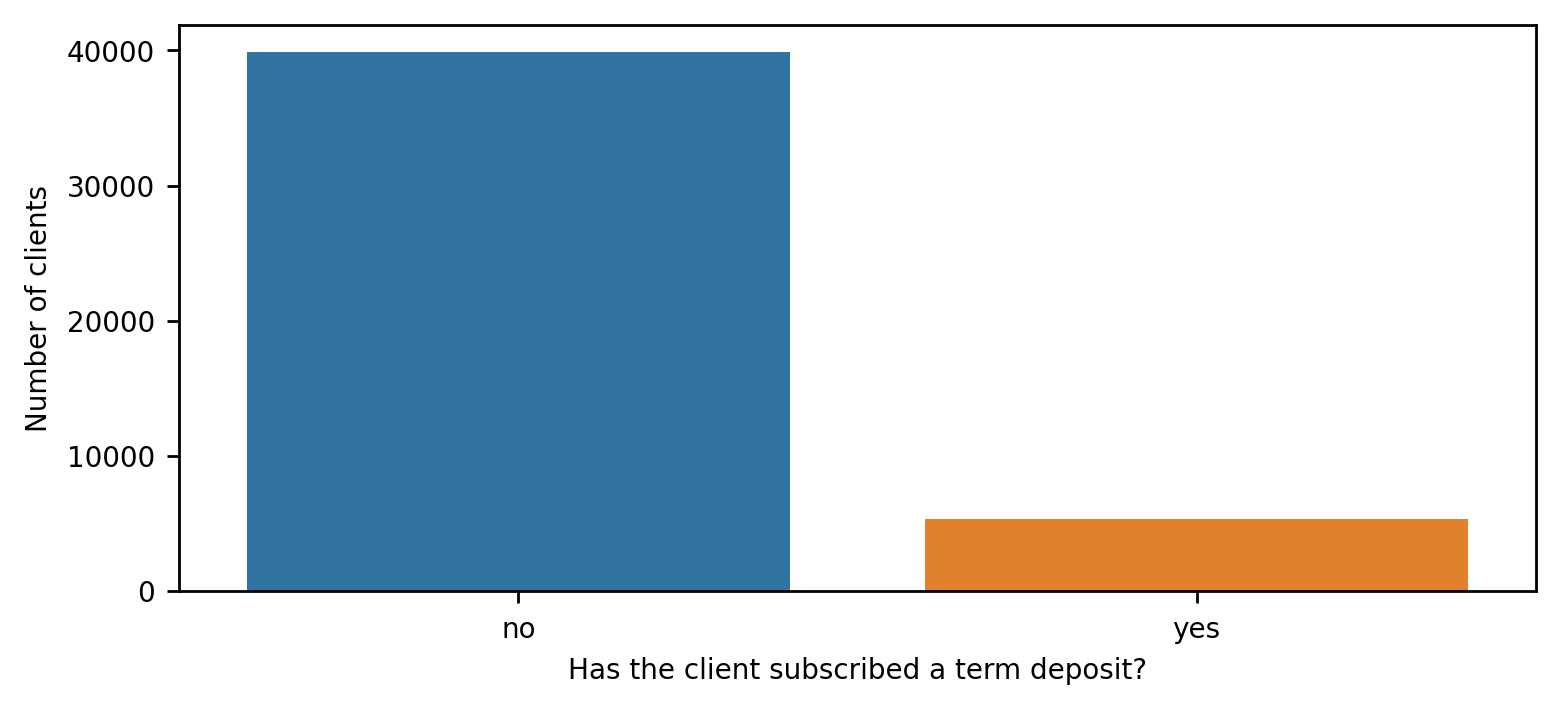

In [23]:
# Counterplot corresponding to y column
sns.countplot(x='y', data=data, figure=plt.figure(figsize=(7,3), dpi=250))
plt.xlabel('Has the client subscribed a term deposit?', fontsize=8)
plt.ylabel('Number of clients', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

The next step to consider is to do the label encoding of the string variables, which all of them are of the categorical type.

In [ ]:
# We create a LabelEnconder object
encoder = preprocessing.LabelEncoder()

# We create an iterator over the names of the categorical variables
categorical_labels = data.select_dtypes(include=['object']).columns

# We overwrite the columns of the categorical variables to convert them into numeric values
for label in categorical_labels:
    data[label] = encoder.fit_transform(data[label])

In [ ]:
# Let us see the result of transforming the categorical variables
for label in categorical_labels:
    print(data[label].value_counts())
    print('-------------------------')

Now, we are ready to make some component analysis of the dataset since it is needed to give the prediction model the correct inputs. This will be done through the Prince Python 3 package, wich you can find [here](https://github.com/MaxHalford/prince). Since we have a dataset with categorical and numerical features, it is needed to do a Factor Analysis of Mixed Data (FAMD), which is provided in Prince. After fit the dataset to the FAMD object, we need to check the cumulative contribution of each component to the total inertia. Recall that the total inertia is the sum of all the eigenvalues.

In [87]:
# Let us get the intputs and the targets
X, y = data.drop(["y"], axis=1), data["y"]

# Let us check the best number of principal components to use
famd = prince.FAMD(n_components=16, copy=True, check_input=True, random_state=10, engine='auto')

# We must fit the X data
famd = famd.fit(X)

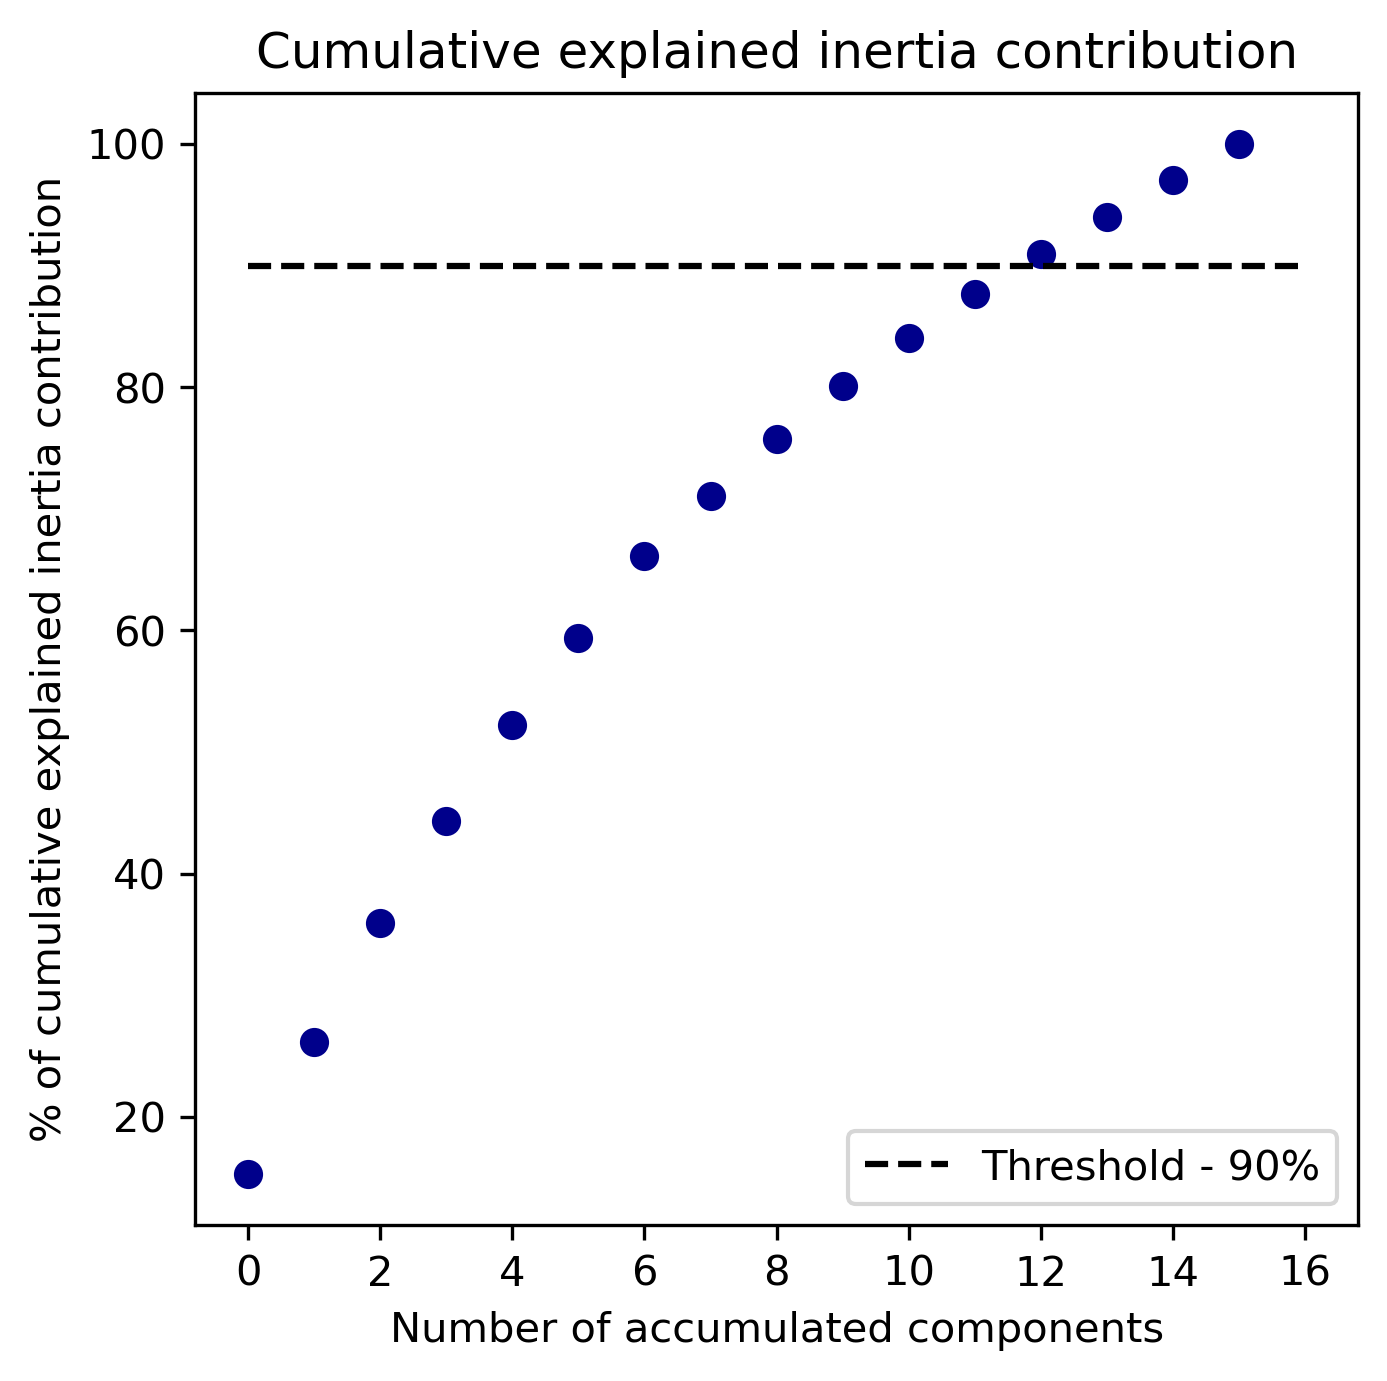

'famd.plot_row_coordinates(X, ax=ax, figsize=None, x_component=0, y_component=1, labels=None,\n                          color_labels=y, ellipse_outline=False, ellipse_fill=True, show_points=True,\n                         s=0.3)\nplt.legend(markerscale=6)\nplt.show()'

In [88]:
# Let us get the eigenvalues in increasing order
eig = famd.eigenvalues_

# We define the total inertia
tot_in = np.sum(eig)

# We define the explained inertia for each component
exp_in = eig/tot_in

# Let us create the cumulative explained inertia contribution array
cumulative = []
for i in range(len(exp_in)):
    cumulative.append(np.sum(exp_in[:i+1]))
    
cumulative = np.array(cumulative)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=300)
ax.scatter(np.arange(0, len(cumulative), 1), 100*cumulative, color='darkblue')
ax.plot(np.linspace(0, 16, 100), 90*np.ones(100), ls='--', color='black', label=r'Threshold - 90%')
ax.set_xlabel('Number of accumulated components')
ax.set_ylabel(r'% of cumulative explained inertia contribution')
ax.set_title('Cumulative explained inertia contribution')
plt.legend(loc='lower right')
plt.show()

"""famd.plot_row_coordinates(X, ax=ax, figsize=None, x_component=0, y_component=1, labels=None,
                          color_labels=y, ellipse_outline=False, ellipse_fill=True, show_points=True,
                         s=0.3)
plt.legend(markerscale=6)
plt.show()"""

Ahora estamos listos para la etapa del modelado. El objetivo es evaluar una serie de modelos de clasificación y elegir el que mejor resultados devuelve prediciendo la columna 21 que representa si se suscribe al servicio correspondiente. Preparemos el conjunto de valores con el cual se entrenarán los modelos y el conjunto de datos objetivo, los cuales servirán para corroborar las predicciones hechas por dichos modelos.

In [ ]:
# Las datos con los que se entrenará y evaluará a los modelos serán almacenados en la variable X
X = data.drop(columns=['duration', 'y'], axis=1)

# Las datos objetivos con los que se corroborarán las predicciones de los modelos serán almacenados en la variable Y
Y = data['y']

En la variable X $\textit{no}$ almacenamos la columna duration ya que solo debe ser tomada como referencia en el análisis descriptivo de los datos y no durante el proceso de entrenamiento. Como lo que queremos implementar es un modelo de aprendizaje automático, debemos tener datos de entrenamiento y de validación. Para ello, procedemos a dividir los datos almacenados en X e Y en esos dos tipos de clases.

In [ ]:
# Generaremos 4 tipos de datos, los datos de entrada del algoritmo en versión entrenamiento y validación y los datos objetivos
# en las mismas dos versiones. El conjunto de datos de validación será el 20% del conjunto de datos de entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
# Chequeemos los tamaños de los conjuntos de entrenamiento y validación
print('X_train.shape =', X_train.shape, 'X_test.shape =', X_test.shape, 'Y_train.shape =', Y_train.shape, 'Y_test.shape =', Y_test.shape)

Con los conjuntos de datos listos para ser utilizados, estamos en condiciones de abordar el estudio de distintos modelos de clasificación. Estudiaremos los modelos de clasificación provistos en el paquete $\textit{xgboost}$, los cuales son los instanciados por las clases $\texttt{XGBClassifier}$ y $\texttt{XGBRFClassifier}$.

In [ ]:
# Instanciamos los objetos clasificadores
clasificador, clasificador_RF = [], []
learning_rates = [0.3, 0.03, 0.003]

for eta in learning_rates:
    clasificador.append(XGBClassifier(learning_rate=eta,
                                      gamma=0.1,
                                      max_depth=5,
                                      colsample_bytree=0.8,
                                      subsample=0.8,
                                      min_child_weight=1,
                                      scale_pos_weight=1,
                                      objective='binary:logistic'))
    clasificador_RF.append(XGBRFClassifier(learning_rate=eta,
                                      gamma=0.1,
                                      max_depth=5,
                                      colsample_bytree=0.8,
                                      subsample=0.8,
                                      min_child_weight=1,
                                      scale_pos_weight=1,
                                      objective='binary:logistic'))

Evaluaremos 6 modelos diferentes, de dos tipos principales, un clasificador y un clasificador que utiliza la técnica de $\textit{random forest}$. En ambos casos se probará con 3 tasas de aprendizaje diferentes, las cuales fueron elegidas como $\eta_{1} = 0.3$, $\eta_{2} = 0.03$ y $\eta_{3} = 0.003$.

In [ ]:
# Entrenamos a los modelos propuestos
clasificador[0].fit(X_train, Y_train, eval_metric='auc')
clasificador[1].fit(X_train, Y_train, eval_metric='auc')
clasificador[2].fit(X_train, Y_train, eval_metric='auc')
clasificador_RF[0].fit(X_train, Y_train, eval_metric='auc')
clasificador_RF[1].fit(X_train, Y_train, eval_metric='auc')
clasificador_RF[2].fit(X_train, Y_train, eval_metric='auc')

In [ ]:
# Veamos las predicciones que hacen los modelos entrenados sobre los datos de evaluación
test_pred, test_pred_RF = [], []

for i in range(len(clasificador)):
    test_pred.append(clasificador[i].predict(X_test))
    test_pred_RF.append(clasificador_RF[i].predict(X_test))

Ahora debemos evaluar la eficacia de las predicciones hechas por los modelos entrenados. Para eso usaremos la métrica $\texttt{average_precision_score}$ provista por sklearn.

In [ ]:
# Calculemos los average_precision_scores para cada uno de los 6 modelos.
aps, aps_RF = [], []

for i in range(len(clasificador)):
    aps.append(metrics.average_precision_score(Y_test, test_pred[i]))
    aps_RF.append(metrics.average_precision_score(Y_test, test_pred_RF[i]))

In [ ]:
# Veamos los valores de los average_precision_scores
for i, eta in enumerate(learning_rates):
    print('aps_{} ='.format(eta), aps[i], '---', 'aps_RF_{} ='.format(eta), aps_RF[i])

Para dar la conclusión final, debemos calcular el porcentaje de valores 'yes' en $Y_{train}$.

In [ ]:
# Calculemos los valores que hay en Y_train
w = Y_train.value_counts()

# Imprimimos la fracción de valores 'yes' sobre el total de valores
print(w[1]/(w[0] + w[1]))

Concluimos que, al ser la fracción de valores 'yes' del orden de 0.11 y por ser el $\textit{average precision score}$ en el caso del modelo XGBClassifier con $\eta_{3} = 0.003$ del orden de 0.26, este modelo es un modelo aceptable para predecir el estado de suscripción de depósito de los clientes del banco.

#### Referencias
[1] https://www.kaggle.com/code/residentmario/data-types-and-missing-values/tutorial

[2] https://stats.stackexchange.com/questions/5774/can-principal-component-analysis-be-applied-to-datasets-containing-a-mix-of-cont

[3] https://towardsdatascience.com/factor-analysis-of-mixed-data-5ad5ce98663c

[4] https://nextjournal.com/pc-methods/calculate-pc-mixed-data?change-id=CWQNw1kVRgQMFFzobMC2bo&node-id=d4243af6-f940-41fc-8ffa-a235bc135601

---

[2] https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc/

[3] https://xgboost.readthedocs.io/en/stable/index.html

[4] https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/